In [1]:
# Standardbibliotheken importieren
import sys
import os
import importlib.util

# Projektpfad zur Modul-Suche hinzufügen
app_path = os.path.abspath('../app')       # Absoluten Pfad zum 'app'-Verzeichnis ermitteln
sys.path.insert(0, app_path)               # Diesen Pfad zu sys.path hinzufügen, damit er importierbar ist

# mainapp.py dynamisch laden und ausführen
spec = importlib.util.spec_from_file_location("mainapp", os.path.join(app_path, "mainapp.py"))  # Lade-Spezifikation
mainapp = importlib.util.module_from_spec(spec)  # Leeres Modul-Objekt erstellen
spec.loader.exec_module(mainapp)                 # Modul ausführen und verfügbar machen


In [2]:
# Import der benötigten Bibliotheken
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
# Anzeigeoptionen von pandas anpassen:
pd.set_option("display.width", 120)       # Setzt die maximale Breite der Anzeige (für besser lesbare Tabellen)
pd.set_option("display.max_columns", 10)  # Begrenze die Anzahl sichtbarer Spalten, um horizontales Scrollen zu vermeiden

# Abruf der Rohdaten über die API – hier z. B. von Zürich (ZRH) nach Barcelona (BCN)
raw_data = mainapp.fetch_flight_data("ZRH", "BCN")  # Erst API-Daten holen (JSON-Format)

# Umwandlung der Rohdaten in ein strukturiertes pandas DataFrame (inkl. Datum, Preis, Transfers etc.)
df = mainapp.prepare_dataframe(raw_data)            # Danach in DataFrame umwandeln

# Ausgabe der ersten Zeilen des aufbereiteten DataFrames zur Kontrolle
print("Erste 5 Zeilen der Daten:")
print(df.head())                                    # Erst jetzt df.head() aufrufen, nachdem df existiert



Erste 5 Zeilen der Daten:
  Reisedatum  Preis (CHF)  Anzahl Transfers  Flugdauer (Minuten) Wochentag der Suche
0 2025-05-13           80                 1                  870            Saturday
1 2025-05-30          105                 0                  225           Wednesday
2 2025-05-13          107                 1                 1325             Tuesday
3 2025-09-10          107                 0                  225            Thursday
4 2025-05-15          112                 0                  225              Friday


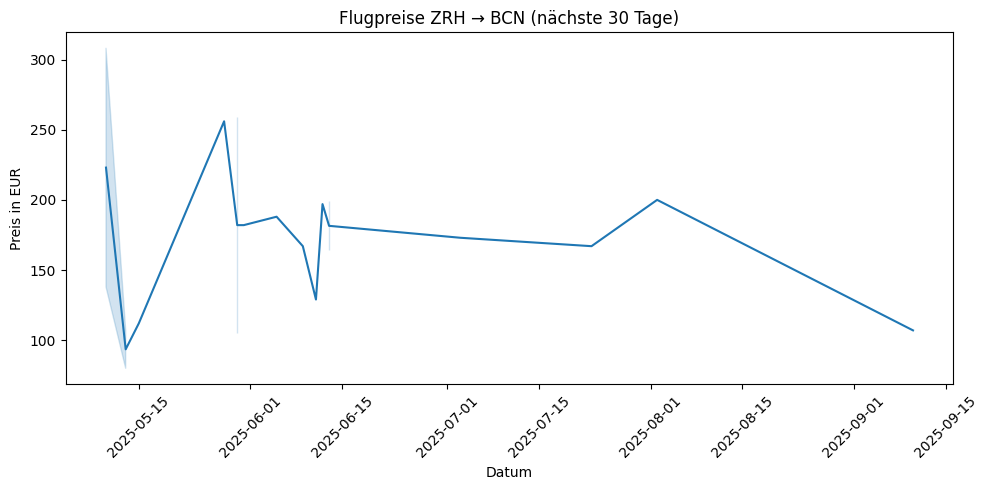

In [4]:
# Erstelle ein Liniendiagramm zur Darstellung der Flugpreise über die nächsten 30 Tage

plt.figure(figsize=(10, 5))  # Setzt die Größe der Abbildung auf 10 x 5 Zoll für bessere Lesbarkeit

# Erzeuge ein Liniendiagramm mit dem Reisedatum auf der X-Achse und dem Preis auf der Y-Achse
sns.lineplot(x="Reisedatum", y="Preis (CHF)", data=df)

# Titel des Diagramms setzen
plt.title("Flugpreise ZRH → BCN (nächste 30 Tage)")

# Achsenbeschriftungen hinzufügen
plt.xlabel("Datum")             # X-Achse zeigt das Reisedatum
plt.ylabel("Preis in EUR")      # Y-Achse zeigt den Flugpreis (Hinweis: ggf. korrigieren auf CHF, wenn nötig)

# Drehe die Datumsbeschriftungen auf der X-Achse um 45 Grad, damit sie nicht überlappen
plt.xticks(rotation=45)

# Layout automatisch anpassen, damit nichts abgeschnitten wird
plt.tight_layout()

# Diagramm anzeigen
plt.show()


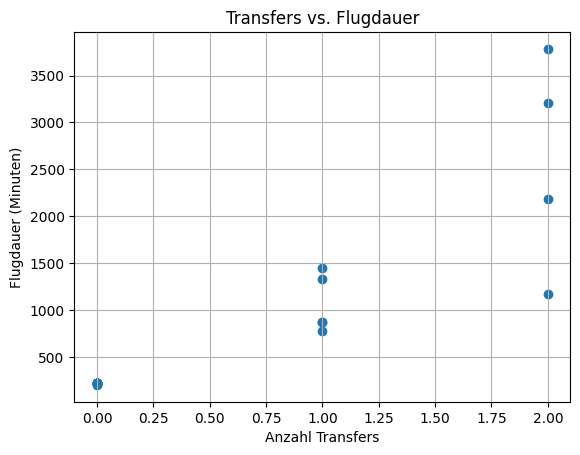

In [5]:
# Erstelle ein Streudiagramm (Scatterplot), um den Zusammenhang zwischen Anzahl Transfers und Flugdauer zu visualisieren

# X-Achse: Anzahl der Transfers, Y-Achse: Flugdauer in Minuten
plt.scatter(df["Anzahl Transfers"], df["Flugdauer (Minuten)"])

# Achsenbeschriftungen setzen
plt.xlabel("Anzahl Transfers")             # Beschriftung der X-Achse (z. B. 0 = Direktflug, 1 = 1 Zwischenstopp)
plt.ylabel("Flugdauer (Minuten)")          # Beschriftung der Y-Achse (gesamte Reisedauer)

# Titel des Diagramms setzen
plt.title("Transfers vs. Flugdauer")       # Titel erklärt, was dargestellt wird

# Gitternetz aktivieren für bessere Lesbarkeit der Punkte
plt.grid(True)

# Diagramm anzeigen
plt.show()

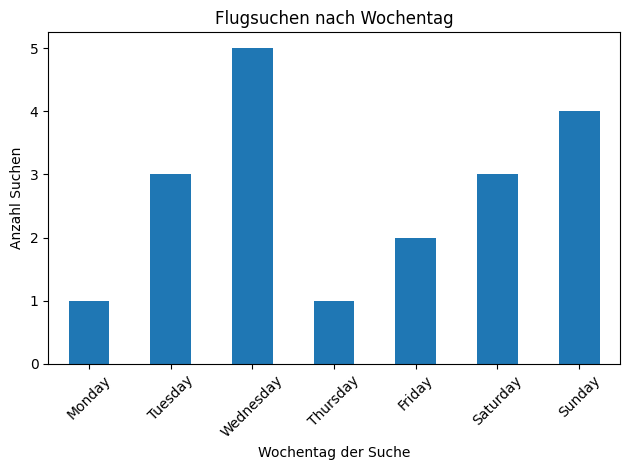

In [6]:
# Häufigkeit von Flugsuchen pro Wochentag analysieren und visualisieren

# Definiere die gewünschte Reihenfolge der Wochentage für die spätere Sortierung im Diagramm
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Zähle, wie oft jeder Wochentag in der Spalte 'Wochentag der Suche' vorkommt
day_counts = df["Wochentag der Suche"].value_counts()

# Sortiere die Zählwerte nach der definierten Reihenfolge der Wochentage
day_counts = day_counts.reindex(weekday_order)

# Erstelle ein Balkendiagramm der Flugsuchen pro Wochentag
day_counts.plot(kind="bar")
plt.title("Flugsuchen nach Wochentag")        # Titel des Diagramms
plt.xlabel("Wochentag der Suche")             # Beschriftung der X-Achse
plt.ylabel("Anzahl Suchen")                   # Beschriftung der Y-Achse
plt.xticks(rotation=45)                       # Drehe die Beschriftung der X-Achse für bessere Lesbarkeit
plt.tight_layout()                            # Verhindert abgeschnittene Beschriftungen
plt.show()                                    # Zeigt das Diagramm an

In [7]:
# Durchschnittliche Preise pro Wochentag berechnen
weekday_avg = mainapp.compare_weekday_prices(df)

# In DataFrame umwandeln für schönere Ausgabe
weekday_df = weekday_avg.reset_index()
weekday_df.columns = ["Wochentag", "Durchschnittlicher Preis (CHF)"]

# Reihenfolge der Wochentage definieren
wochentag_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Wochentag als kategorische Variable mit Reihenfolge setzen
weekday_df["Wochentag"] = pd.Categorical(weekday_df["Wochentag"], categories=wochentag_order, ordered=True)

# Sortieren nach der richtigen Reihenfolge
weekday_df = weekday_df.sort_values("Wochentag")

# Ausgabe
print("\nDurchschnittliche Preise pro Wochentag:")
print(weekday_df)




Durchschnittliche Preise pro Wochentag:
   Wochentag  Durchschnittlicher Preis (CHF)
1     Monday                          167.00
4    Tuesday                           93.50
5  Wednesday                          164.75
3   Thursday                          167.50
0     Friday                          181.75
2   Saturday                          207.00


In [8]:
# Führe einen t-Test mit den Daten im DataFrame df durch
t, p = mainapp.run_statistical_test(df)

# Gib das Testergebnis aus: t-Wert zeigt die Differenz der Mittelwerte, p-Wert die Signifikanz
print(f"\nt-Test Ergebnis:")
print(f"t-Wert: {t:.2f}")  # Ausgabe des t-Werts mit zwei Nachkommastellen
print(f"p-Wert: {p:.4f}")  # Ausgabe des p-Werts mit vier Nachkommastellen

# Überprüfe, ob der p-Wert unter 0.05 liegt → statistisch signifikant
if p < 0.05:
    print("Statistisch signifikanter Unterschied zwischen Donnerstag und Samstag")
else:
    print("Kein signifikanter Preisunterschied festgestellt")


t-Test Ergebnis:
t-Wert: -0.97
p-Wert: 0.3821
Kein signifikanter Preisunterschied festgestellt
